<h1 align = "center">Will it be raining tomorrow in Australia?</h1>

[Kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package)

In [233]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr

In [126]:
df = pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [55]:
df.Date = pd.to_datetime(df.Date)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [127]:
df = df.drop(columns= ["Date","RISK_MM"])

In [57]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [128]:
pd.isnull(df).sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [147]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.185565,23.225365,2.326738,5.183213,8.042236,39.920123,13.992489,18.644279,68.858235,51.495742,1017.648460,1015.252481,4.649568,4.702658,16.985681,21.675977
std,6.388936,7.109617,8.426426,3.185401,2.769638,13.140632,8.851614,8.721688,18.932512,20.532227,6.746267,6.681810,2.294357,2.118753,6.472206,6.871243
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [ ]:
toPlot = [df[i] for i in df.columns if df[i].dtype != "O"]
toPlot = [toPlot[i][pd.notnull(toPlot[i])] for i in range(len(toPlot))]

plt.figure(1, figsize = (9,6))
plt.boxplot(toPlot)
plt.show

For continuous variables, many outliers are detected. So, the correct imputation technique to use to fill NaN values is by using median. In addition, for categorical variables, we're going to fill NaN values by using their each mode.

In [138]:
# fill NaN values in continuous variables with median
df = df.fillna(df.median()) 

# fill NaN values in categorical variables with mode
objectVar = [i for i in df.columns if df[i].dtype == "O"]
df[objectVar] = df[objectVar].fillna(df[objectVar].mode().iloc[0,:])

pd.isnull(df).sum()

## Exploratory Data Analysis

### Target Variable Proportion

In [168]:
print("Proportion of target variable")
print(df.RainTomorrow.value_counts(),"\n")
print("Proportion of target variable in percentage")
print(df.RainTomorrow.value_counts()/df.shape[0]*100)

Proportion of target variable
No     110316
Yes     31877
Name: RainTomorrow, dtype: int64 

Proportion of target variable in percentage
No     77.581878
Yes    22.418122
Name: RainTomorrow, dtype: float64


Temporarily, we can consider the proportion is sufficiently balanced. If later we will find this is not balanced enough, we will tackle with this problem.

### Multicollinearity

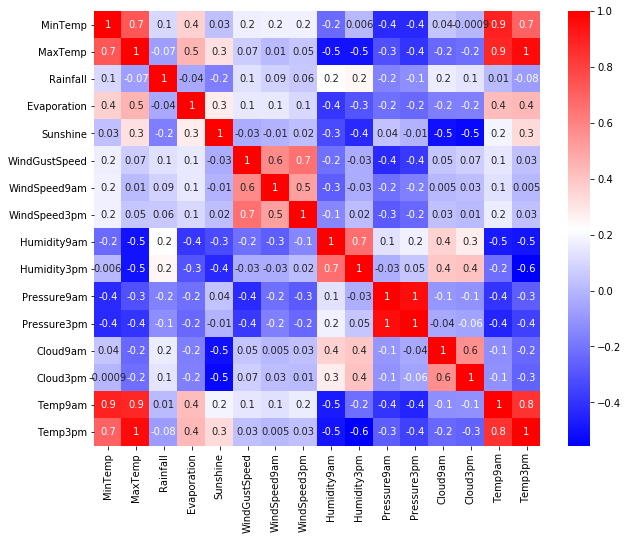

In [195]:
plt.figure(1, figsize = (10,8))
sns.heatmap(df.corr(), annot = True, fmt = ".1g", cmap = "bwr")
plt.show()

Check p-value

In [243]:
contVar = [i for i in df.columns if df[i].dtype != "O"]
contVar_comb = list(itertools.combinations(contVar,2))

Alpha = 0.05
between = []
pvals = []
mult = []

for i in contVar_comb:
    (cor, pval) = pearsonr(df[i[0]], df[i[1]])
#     print("Corr test between " + i[0] + " & " + i[1])
#     print("Multicollinear detected\n") if pval < Alpha else print("Safe! No Multicollinear\n")
    between.append(i[0] + " & " + i[1])
    pvals.append(pval)
    mult.append("Yes" if pval < Alpha else "No")

multicol = {"Between":between, "P-value":pvals, "Multicollinear":mult}
multicol = pd.DataFrame(multicol)
multicol

,Between,P-value,Multicollinear
0,MinTemp & MaxTemp,0.000000e+00,Yes
1,MinTemp & Rainfall,0.000000e+00,Yes
2,MinTemp & Evaporation,0.000000e+00,Yes
3,MinTemp & Sunshine,1.150504e-30,Yes
4,MinTemp & WindGustSpeed,0.000000e+00,Yes
5,MinTemp & WindSpeed9am,0.000000e+00,Yes
6,MinTemp & WindSpeed3pm,0.000000e+00,Yes
7,MinTemp & Humidity9am,0.000000e+00,Yes
8,MinTemp & Humidity3pm,2.251252e-02,Yes
9,MinTemp & Pressure9am,0.000000e+00,Yes


In [238]:
i[0] + " & " + i[1]

'Temp9am & Temp3pm'

In [226]:
contVar_comb[119][1]

'Temp3pm'

In [200]:
import itertools
arr = [1,2,3,4]
res = []
for l in range(2, len(arr)):
    for x in itertools.combinations(arr, l):
        res.append(x)
res

[(1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 4),
 (2, 3, 4)]